# Day 22: Crab Cups

([Povezava na nalogo]())

Imamo oštevilčene kozarce, postavljene v krog. Razpored števil in kozarec, pri katerem začnemo, sta v podatkih. V primeru na sliki je določeno, da začnemo pri kozarcu 3.

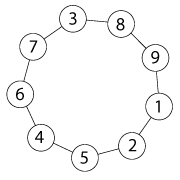

V vsakem koraku naredimo tole.

- Vzamemo tri kozarce, ki sledijo trenutnemu v smeri urinega kazalca (če je trenutni kozarec 3, so to kozarci 8, 9 in 1).
- Poiščemo kozarec, katerega številka je za 1 manjša od trenutnega. V tem primeru je to kozarec 2. Če bi bil to ravno kateri izmed treh kozarcev, zmanjšamo številko še za 1 (in po potrebi še in po potrebi še, tako da pridemo do enega izmed kozarcev, ki so še v krogu). Če izberemo kozarec 0 (ki ne obstaja), vzamemo kozarec z najvišjo številko (v tem primeru 9).
- Odvzete tri kozarce postavimo za ta kozarec. V gornjem primeru postavimo 8, 9 in 1 za 2, torej med 2 in 5.
- Naslednji trenutni kozarec je kozarec, ki sledi trenutnemu. V gornjem primeru je to 2 (ker smo 8, 9 in 1 odstranili).

## Prvi del

Gornji recept ponovimo stokrat. Kakšen je vrstni red kozarcev od 1 naprej?

Da se ne hecamo brez potrebe s tem, ali se trije kozarci, ki sledijo trenutnemu, že ovijajo okrog, bomo vrteli seznam: trenutni element bo vedno ničti. Ko gremo na naslednji element, bomo v resnici dali trenutni element na konec.

Dobimo takšen program.

In [1]:
initial = "389125467"
state = list(map(int, initial))

for round in range(100):
    current, removed, state = state[0], state[1:4], state[4:]
    place = current - 1 or 9
    while place in removed:
        place = place - 1 or 9
    pi = state.index(place) + 1
    state[pi:pi] = removed
    state.append(current)
    
pos = state.index(1)
state = state[pos + 1:] + state[:pos]
print("".join(map(str, state)))

67384529


V `state` prepišemo števila, pretvorjena v `int`-e. Nato v zanki vzamemo prvo število, naslednja tri in ostala. Poiščemo mesto za vstavljanje; `place` bo trenutni - 1, oziroma `9`, če bi trenutni s tem postal 0. V zanki nato poskrbimo za primer, ko  je `place` eden od odstranjenih kozarcev.

Nato odkrijemo, kjer v seznamu je kozarec, za katerim morajo biti trije kozarci, ki jih premikamo (`pi`). V mesto med `pi` in `pi` - torej točno za `pi`, damo odstranjene kozarce, na konec pa še trenutnega. Ne spreglejmo, da `state` pred temu prirejani vsebuje samo preostale kozarce, brez prvega (trenutnega) in tistih treh, ki mu sledijo.

Po stotih potezah poiščemo kozarec 1. Seznam prevrtimo tako, da imamo najprej kozarca 1 do konca in nato kozarce od začetka do tega kozarce. Števila pretvorimo v števke, združimo v niz in izpišemo.

## Drugi del

Slaba novica: kozarcu 9 sledijo še kozarci od 10 do milijon. Poleg tega ne naredimo sto korakov temveč deset milijonov korakov.

Gornji program nima šans. Lahko ga prepišemo v numpy, pa se bo izvajal uro ali dve. Dodamo trik ali dva, pa bo morda dvakrat ali trikrat hitrejši.

Tu je potrebno uporabiti drugačen pristop. Sprogramirali ga bomo na tem, krajšem primeru, potem pa ga dopolnili do milijonov.

Osnovni problem gornjega programa je, da kopira sezname v nov seznam. Tudi če se temu izognemo in premikamo števila znotraj nekega seznama, jih je še vedno potrebno premikati. In s premikanjem milijona števil je veliko dela. Tudi če ne vrtimo seznama, tako da je trenutni element vedno na začetku, ne bomo nič na boljšem, saj je treba premikati elemente seznama, ko odstranjujemo in vstavljamo te tri elemente.


### Krožni seznam

Potrebujemo nekaj, kar Python, kolikor vem, ni vdelano v Python: seznam. :) Pythonovi seznami so bolj tabele, *array*-i. Potrebujemo povezan seznam. Za vsak kozarec moramo vedeti, kateri kozarec mu sledi.

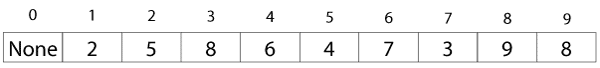

Devet kozarcev bomo predstavili s seznamom dolžine 10; prvi element bo za okras. No, za praktičnost. Element 3, recimo, vsebuje 8, ker kozarcu 3 sledi kozarec 8.

To nam poenostavi prestavljanje kozarcev, saj je potrebno, kot bomo videli, spremeniti le štiri številke, ne pa prestavljati milijona elementov.

Najprej sestavimo tabelico, kot je gornja. Sestavimo tabelo `None`-ov. Nato se zapeljemo čez vse pare `(ta, potem)` in zabeležimo, da za `ta` pride `potem`. `zip` sestavimo tako, da za `potem` prestavimo prvi element ("seznam, ki vsebuje samo prvi element") na konec seznama.

In [2]:
initial = "389125467"
state = list(map(int, initial))

circle = [None] * (len(state) + 1)
for ta, potem in zip(state, state[1:] + state[:1]):
    circle[ta] = potem

Dobimo, kar je treba.

In [3]:
circle

[None, 2, 5, 8, 6, 4, 7, 3, 9, 1]

### Igra

Zdaj pa pripravimo funkcijo, ki kot argument dobi gornjo strukturo in število korakov.

In [4]:
def run(circle, rounds):
    last_cup = len(circle) - 1
    current = state[0]
    for round in range(rounds):
        a = circle[current]
        b = circle[a]
        c = circle[b]

        next3 = (a, b, c)
        where = current - 1 or last_cup
        while where in next3:
            where = where - 1 or last_cup

        circle[current] = circle[c]
        circle[c] = circle[where]
        circle[where] = a
        
        current = circle[current]

Kar iz seznama razberemo številko zadnjega kozarca, ki ga potrebujemo takrat, ko iščemo kozarec s številko, nižjo od trenutnega.

Prvi začetni kozarec je `state[0]`. Nato v zanki najprej poberemo številke naslednjih treh kozarcev (`a`, `b`. `c`).

V `where` izračunamo številko kozarca, za katerega je potrebno postaviti `a`, `b` in `c`. To gre podobno kot prej, le da namesto `9` uporabljamo `last_cup`.

Sledijo prevezave.
- Prva je preprosta: da izločimo `a`, `b` in `c`, ki sledijo kozarcu `current`, mora kozarcu `current` po nove, slediti tisto, kar je prej sledilo `c`-ju.
- Druga je vstavljanje: kozarce `a`, `b` in`c` je potrebno vriniti med `where` in kozarec, ki sledi `where`.

To postorimo v treh vrsticah:
- kozarcu `current` po novem sledi kozarec, ki trenutno sledi kozarcu `c` (`circle[c]`);
- kozarcu `c` sledi kozarec, ki je prej sledil kozarcu `where`;
- kozarcu `where` pa kozarec `a`.

Na koncu še premaknemo `current` na kozarec, ki mu sledi.

### Prvi del

Za prvi del pokličemo gornjo funkcijo, začnemo pri kozarcu, ki sledi `1`, gremo po krogu in si beležimo številke. 

In [5]:
run(circle, 100)

i = circle[1]
res = ""
for _ in range(8):
    res += str(i)
    i = circle[i]
    
res

'67384529'

### Drugi del

Najprej pripravimo krog. Najprej desetkrat `None`, potem pa na mesta od 10 do `last_cup` postavimo številke od 11 do `last_cup + 1`, tako da vsaka številka kaže na naslednjo. Temu sledi enaka zanka, kot zgoraj. Na koncu še povežemo seznama: zadnji element začetnega zaporedja mora kazati na `10` (začetek dodatnih elementov), zadnji dodatni element pa kaže na prvi element začetnega zaporedja.

In [6]:
last_cup = 1000000
circle = [None] * 10 + list(range(11, last_cup + 1))
for ta, potem in zip(state, state[1:] + state[:1]):
    circle[ta] = potem

circle[state[-1]] = 10
circle.append(state[0])

Zdaj poženemo zahtevan milijon ciklov. Poberemo številko kozarca, ki sledi `1` in številko kozarca, ki sledi temu kozarcu, ter ju, kot zahteva naloga, zmnožimo.

In [7]:
run(circle, 10000000)

a = circle[1]
b = circle[a]

a * b

149245887792